In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [16]:
xlsx_file= pd.ExcelFile("KPMG_CleanedData.xlsx")

In [17]:
xlsx_file.sheet_names

['Customer_address', 'Customer_Demography', 'Transaction', 'New_customer']

In [18]:
df_cadd = pd.read_excel(xlsx_file,sheet_name='Customer_address')

In [19]:
df_cadd.head(2)

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,NSW,Australia,10
1,2,6 Meadow Vale Court,2153,NSW,Australia,10


In [20]:
df_cdemo=pd.read_excel(xlsx_file,sheet_name='Customer_Demography')

In [21]:
df_cdemo.head(2)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,DOB - Copy,Age
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11,1953-10-12,69
1,2,Eli,Bockman,M,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16,1980-12-16,42


In [22]:
df_tran = pd.read_excel(xlsx_file,sheet_name='Transaction')

In [23]:
df_tran.head(2)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62
1,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92


In [24]:
df_newC = pd.read_excel(xlsx_file,sheet_name='New_customer')

In [25]:
df_newC.head(2)

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,property_valuation,Column17,Column18,Column19,Column20,Column21,Rank,Value,DOB - Copy,Age
0,Chickie,Brister,M,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,6,0.56,0.70,0.8750,0.743750,1,1,1.71875,1957-07-12,66.0
1,Morly,Genery,M,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,11,0.89,0.89,1.1125,0.945625,1,1,1.71875,1970-03-22,53.0


### Data Preperation

In [26]:
df=df_tran.merge(df_cdemo,on='customer_id')
df.head(2)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,DOB - Copy,Age
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,...,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10,1955-01-11,68
1,11065,1,2950,2017-10-16,False,Approved,Giant Bicycles,Standard,medium,medium,...,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10,1955-01-11,68


In [27]:
df.drop(['first_name','last_name'],axis=1)
df=df.merge(df_cadd,on='customer_id')

### Exploratory Data Analysis

Gender

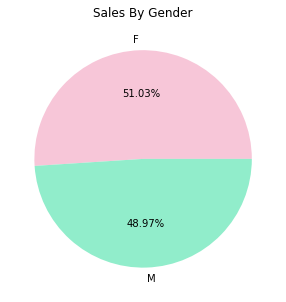

In [14]:
fig ,ax =plt.subplots(figsize=(5,5))
table=df.pivot_table(index='gender',values='list_price',aggfunc=np.sum).reset_index()
plt.pie(table['list_price'],labels = table['gender'],autopct="%1.2f%%",colors=['#f7c6d8','#91edcb'])
plt.title('Sales By Gender')
plt.show()

Age Segment

In [15]:
df['Age_segment'] = pd.cut(df.Age, bins=[10,20,30,40,50,60,70,80,90,100],
                           labels = ['10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100'])

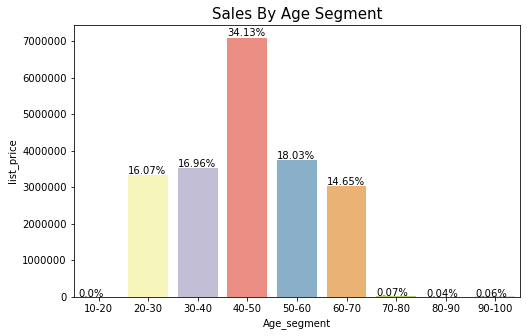

In [16]:
fig,ax=plt.subplots(figsize=(8,5))
table=df.pivot_table(index='Age_segment',values='list_price',aggfunc=np.sum).reset_index()
figure=sns.barplot(x=table['Age_segment'],y=table['list_price'],palette='Set3')
plt.ticklabel_format(style='plain',axis='y')
i=0
for c in figure.patches:
    width,height= c.get_width() , c.get_height()
    x,y= c.get_xy()
    plt.text(x, y+ height+height/100,
             str(round(table.list_price[i]/sum(table.list_price)*100,2))+'%',
             size=10,)
    i+=1
plt.title('Sales By Age Segment',size=15);

Wealth Segment

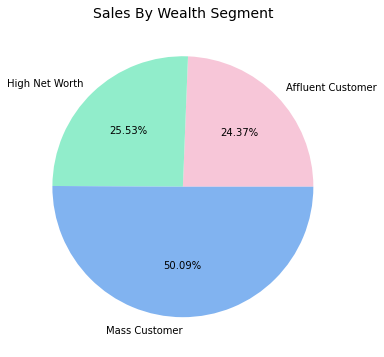

In [17]:
fig,ax=plt.subplots(figsize=(6,6))
table=df.pivot_table(index='wealth_segment',values='list_price',aggfunc=np.sum).reset_index()
plt.pie(table['list_price'],labels = table['wealth_segment'],autopct="%1.2f%%",colors=['#f7c6d8','#91edcb','#81b3f0'])
plt.title('Sales By Wealth Segment',size=14)
plt.show()

State

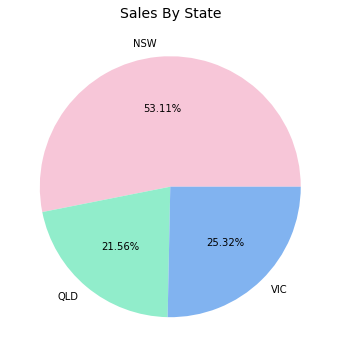

In [18]:
fig,ax=plt.subplots(figsize=(6,6))
table=df.pivot_table(index='state',values='list_price',aggfunc=np.sum).reset_index()
plt.pie(table['list_price'],labels = table['state'],autopct="%1.2f%%",colors=['#f7c6d8','#91edcb','#81b3f0'])
plt.title('Sales By State',size=14)
plt.show()

Job Industry

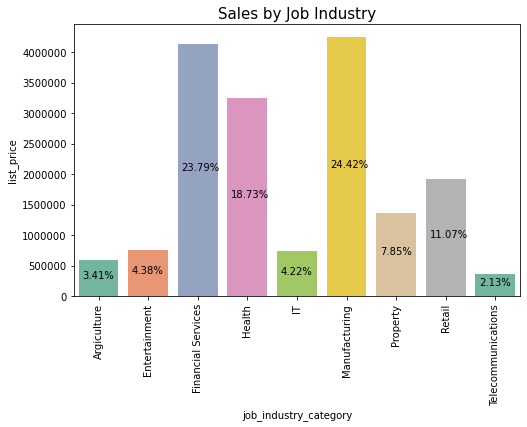

In [19]:
fig,ax = plt.subplots(figsize=(8,5))

table=df.pivot_table(index='job_industry_category',values='list_price',aggfunc=np.sum).reset_index()

figure = sns.barplot(x=table['job_industry_category'],y=table['list_price'],palette='Set2')
plt.ticklabel_format(style='plain',axis='y')
plt.xticks(rotation=90)

i=0
for c in figure.patches:
    width,height= c.get_width(), c.get_height()
    x,y = c.get_xy()
    plt.text(x+0.075,y+height/2,
            str(round(table.list_price[i]/sum(table.list_price)*100,2))+'%',
             size=10)
    i+=1
plt.title('Sales by Job Industry',size=15);

Property Valuation and Car ownership

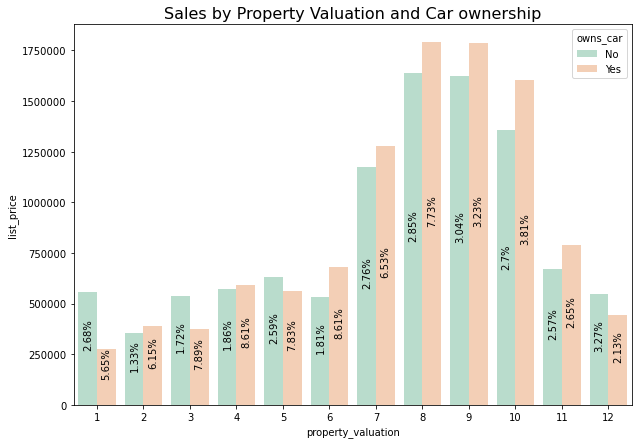

In [20]:
fig,ax=plt.subplots(figsize=(10,7))

table= df.pivot_table(index=["property_valuation","owns_car"],values="list_price", aggfunc=np.sum).reset_index()

figure = sns.barplot(x=table['property_valuation'],y=table['list_price'],hue=table['owns_car'],palette='Pastel2')
plt.ticklabel_format(style='plain',axis='y')
i=0
for c in figure.patches:
    width,height= c.get_width() , c.get_height()
    x,y= c.get_xy()
    plt.text(x+.1, y+height/2,
             str(round(table.list_price[i]/sum(table.list_price)*100,2))+'%',
             size=10,rotation=90)
    i+=1
    
plt.title('Sales by Property Valuation and Car ownership',size=16);

### RFM Metrics Calculation

In [21]:
max_date = df['transaction_date'].max()

In [22]:
max_date

Timestamp('2017-12-30 00:00:00')

In [23]:
df_rfm = df.groupby("customer_id").agg({'transaction_date': lambda transaction_date : (max_date - transaction_date.max()).days,
                                        'past_3_years_bike_related_purchases' : lambda past_3_years_bike_related_purchases: past_3_years_bike_related_purchases.mean(),
                                        'list_price': lambda list_price: list_price.sum()
                                        })
df_rfm.columns=['Recency','Frequency','Monetary']

In [24]:
df_rfm.head()

,Recency,Frequency,Monetary
customer_id,,,
1,7,93.0,9084.45
2,128,81.0,4149.07
4,195,33.0,1047.72
5,16,56.0,5903.20
6,64,35.0,5931.69


In [25]:
df_rfm['Recency_score'] = pd.qcut(df_rfm['Recency'], 4 ,[4,3,2,1])
df_rfm['Frequency_score'] = pd.qcut(df_rfm['Frequency'], 4 ,[1,2,3,4])
df_rfm['Monetary_score'] = pd.qcut(df_rfm['Monetary'], 4 ,[1,2,3,4])

In [26]:
df_rfm["RFM_class"] = df_rfm.Recency_score.astype(str)+df_rfm.Frequency_score.astype(str)+df_rfm.Monetary_score.astype(str)
df_rfm['RFM_score'] = df_rfm[['Recency_score','Frequency_score','Monetary_score']].astype(int).sum(axis=1)

In [27]:
def label(x):
    if x >= 9:
        return "Can't Loose Them"
    elif ((x >= 8) and (x < 9)):
        return 'Champions'
    elif ((x >= 7) and (x < 8)):
        return 'Loyal'
    elif ((x >= 6) and (x < 7)):
        return 'Potential'
    elif ((x>= 5) and (x < 6)):
        return 'Promising'
    elif ((x >= 4) and (x < 5)):
        return 'Needs Attention'
    else:
        return 'Require Activation'

df_rfm['rfm_label']=df_rfm.RFM_score.apply(label)

df_rfm.head()

,Recency,Frequency,Monetary,Recency_score,Frequency_score,Monetary_score,RFM_class,RFM_score,rfm_label
customer_id,,,,,,,,,
1,7,93.0,9084.45,4,4,4,444,12,Can't Loose Them
2,128,81.0,4149.07,1,4,2,142,7,Loyal
4,195,33.0,1047.72,1,2,1,121,4,Needs Attention
5,16,56.0,5903.20,4,3,3,433,10,Can't Loose Them
6,64,35.0,5931.69,2,2,3,223,7,Loyal


In [28]:
df_rfm.reset_index(inplace=True)

### Model Training

In [29]:
df_model= df_cdemo[['customer_id', 'gender',
       'past_3_years_bike_related_purchases', 'Age',
       'job_industry_category', 'wealth_segment',
       'owns_car' ]]
df_model.job_industry_category = df_model.job_industry_category.fillna('Not Applicable')

C:\Program Files\KMSpico\temp\ipykernel_12320\3538501200.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model.job_industry_category = df_model.job_industry_category.fillna('Not Applicable')


In [30]:
df_model = df_model.merge(df_cadd[['customer_id','state','property_valuation']], on='customer_id')
df_model = df_model.merge(df_rfm[['customer_id','RFM_score']], on='customer_id')

In [31]:
df_model.head()

,customer_id,gender,past_3_years_bike_related_purchases,Age,job_industry_category,wealth_segment,owns_car,state,property_valuation,RFM_score
0,1,F,93,69,Health,Mass Customer,Yes,NSW,10,12
1,2,M,81,42,Financial Services,Mass Customer,Yes,NSW,10,7
2,4,M,33,61,IT,Mass Customer,No,QLD,9,4
3,5,F,56,46,Not Applicable,Affluent Customer,Yes,NSW,4,10
4,6,M,35,56,Retail,High Net Worth,Yes,VIC,9,7


In [32]:
df_model.isnull().sum()

customer_id                            0
gender                                 0
past_3_years_bike_related_purchases    0
Age                                    0
job_industry_category                  0
wealth_segment                         0
owns_car                               0
state                                  0
property_valuation                     0
RFM_score                              0
dtype: int64

In [33]:
pip install catboost --quiet

Note: you may need to restart the kernel to use updated packages.


In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_model.drop(['customer_id','RFM_score'],axis=1),df_model['RFM_score'], test_size=0.2, random_state=0, shuffle=True)

In [35]:
import catboost as cat
cat_feat = ['gender','job_industry_category', 'wealth_segment', 'owns_car','state']
model = cat.CatBoostRegressor(random_state=100,cat_features=cat_feat,verbose=0)
model.fit(X_train,y_train)

In [36]:
y_pred=model.predict(X_test)

In [37]:
map_error= np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("Accuracy: ", round(100- map_error,2),"%")

Accuracy:  75.8 %


In [38]:
df_model['customer_id'].max()

3500

### Predictions

In [39]:
df_newC['id'] = list(range(5000,5000+len(df_newC)))

In [40]:
df_pred=df_newC[['id',
                'gender', 
                'past_3_years_bike_related_purchases', 
                'Age', 
                'job_industry_category', 
                'wealth_segment',
                'owns_car',  
                'state', 
                'property_valuation'
                ]]

In [41]:
df_pred.isnull().sum()

id                                       0
gender                                   0
past_3_years_bike_related_purchases      0
Age                                     17
job_industry_category                  165
wealth_segment                           0
owns_car                                 0
state                                    0
property_valuation                       0
dtype: int64

In [42]:
df_pred.job_industry_category= df_pred.job_industry_category.fillna("Not Available")     
df_pred.Age=df_pred.Age.fillna(df_pred['Age'].mean())

C:\Program Files\KMSpico\temp\ipykernel_12320\3267916903.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pred.job_industry_category= df_pred.job_industry_category.fillna("Not Available")
C:\Program Files\KMSpico\temp\ipykernel_12320\3267916903.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pred.Age=df_pred.Age.fillna(df_pred['Age'].mean())


In [43]:
rfm=model.predict(df_pred[[
                'gender', 
                'past_3_years_bike_related_purchases', 
                'Age', 
                'job_industry_category', 
                'wealth_segment',
                'owns_car',  
                'state', 
                'property_valuation'
                ]])

In [44]:
df_pred['rfm_pred'] = rfm

C:\Program Files\KMSpico\temp\ipykernel_12320\744161844.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pred['rfm_pred'] = rfm


In [45]:
df_pred= df_newC[['id', 'first_name', 'last_name', 'gender','past_3_years_bike_related_purchases', 
                'DOB', 'Age', 'job_title','job_industry_category', 'wealth_segment', 'deceased_indicator',
                'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
                'property_valuation']].merge(df_pred[['id','rfm_pred']]).sort_values('rfm_pred',ascending=False)

In [46]:
df_pred.head()

,id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,Age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,rfm_pred
634,5634,Shellysheldon,Bichard,M,96,1954-01-06,69.0,Desktop Support Technician,Financial Services,Mass Customer,N,Yes,16,7199 Springview Parkway,4503,QLD,Australia,5,9.965437
554,5554,Jacqui,Devey,F,79,1995-10-01,27.0,Analyst Programmer,Financial Services,High Net Worth,N,Yes,13,656 Kennedy Crossing,2261,NSW,Australia,8,9.887724
783,5783,Calhoun,Mussington,M,98,1992-10-13,30.0,Dental Hygienist,Health,Mass Customer,N,No,12,176 Fallview Plaza,2019,NSW,Australia,9,9.724772
359,5359,Pace,Clemonts,M,99,1990-07-28,33.0,Media Manager IV,Retail,High Net Worth,N,No,10,335 Cambridge Hill,3122,VIC,Australia,7,9.665261
288,5288,Giana,Staresmeare,F,96,1976-04-20,47.0,Account Representative IV,Retail,Affluent Customer,N,Yes,9,8737 Scoville Center,2770,NSW,Australia,7,9.637000


In [47]:
#df_pred.to_csv("MostValuableCustomers.csv")